<h2 style="color:red" align="center">Predicting if a person would be married based on his age using logistic regression</h2>

**Problem Statement**: Build a machine learning model that can predict person is married or not
- Q1. Split data for training and testing ? 
- Q2. Find the accuracy of your model ? 
- Q3. Find the probability using test data ?
- Q4. Find values of m and c ?
- Q5. Predict person of age 35 and 46 are married or not ?


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\ML PROJECTS\Marital_Prediction\Data\Marriage_data.csv")
df.head()

,age,married
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


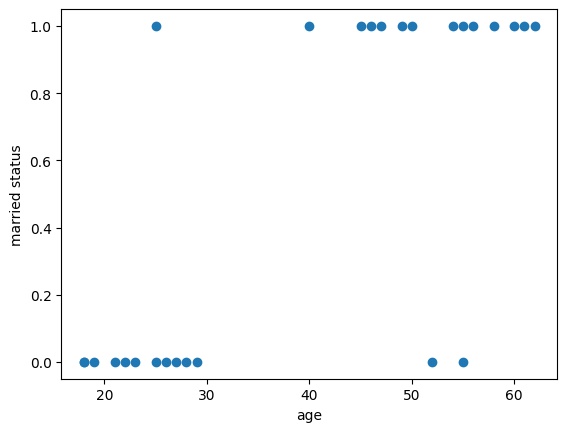

In [3]:
plt.xlabel('age')
plt.ylabel('married status')
plt.scatter(df.age,df.married)

**Q1. Split data for training and testing ?**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.married,train_size=0.8)

In [5]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
X_test

,age
14,49
6,55
23,45
7,60
26,23
20,21


In [7]:
y_test

14    1
6     0
23    1
7     1
26    0
20    0
Name: married, dtype: int64

In [8]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
model.predict([[25]])

array([0], dtype=int64)

**Q2. Find the accuracy of  model ?**

In [10]:
accuracy = model.score(X_test,y_test)
print('accuracy is ',accuracy*100,'%')

accuracy is  83.33333333333334 %


**Q3. Find the probability using test data ?**

In [11]:
model.predict_proba(X_test)  # probabolity of notmarried vs probability of married

array([[0.13785518, 0.86214482],
       [0.05945498, 0.94054502],
       [0.22889888, 0.77110112],
       [0.02834389, 0.97165611],
       [0.8991851 , 0.1008149 ],
       [0.92396939, 0.07603061]])

**Q4. Find values of m and c ?**

In [12]:
m = model.coef_
c = model.intercept_
print('m = ',m,'c = ',c)

m =  [[0.15467009]] c =  [-5.74561473]


# Custom Model

In [13]:
def sigmoid(z):
    yhat=1/(1+np.exp(-z))
    return yhat

In [14]:
def prediction_function(age,w,b):
#   y = mx + c
    z = w * age + b     
    yhat = sigmoid(z)
    if yhat >0.5:
        return 1
    else:
        return 0 

In [28]:
def Gradient_Descent_(X,y):
    w=np.zeros(X.shape[1])
    b=0
    m=len(X)
    alpha=0.001
    for _ in range(500000):
        # Predictions
        z = np.dot(X, w) + b
        yhat=sigmoid(z)
        
         ## Cost Function(MSE)
        MSE= (1/m) * np.sum(( (-y) *np.log(yhat)) - ((1-y)* np.log(1-yhat))  )

        ## Partial Derivative
        func_w = (1/m) * np.dot((yhat-y),X)
        func_b = (1/m) * np.sum(yhat-y)
        
        ## Gradient Descent
        w = w - alpha * func_w
        b = b - alpha * func_b
    return w,b

In [29]:
w,b=Gradient_Descent_(X_train.to_numpy(), y_train.to_numpy())

In [30]:
# predictiong by using Predefined moduls
_35=model.predict([[35]])
_46=model.predict([[46]])
print(f"Age 35 = {_35}\nAge 46 = {_46}")

Age 35 = [0]
Age 46 = [1]


In [31]:
# predicting by using Custom modules
yhat_35=prediction_function(35,w,b)
yhat_46=prediction_function(46,w,b)
print(f"Age 35 = {yhat_35}\nAge 46 = {yhat_46}")

Age 35 = 0
Age 46 = 1


In [33]:
w_p = model.coef_
b_p = model.intercept_
print('Using Predefined labraries w = ',w_p,'b = ',b_p)
print('Using   custom   module    w = ',w,' b = ',b)

Using Predefined labraries w =  [[0.15467009]] b =  [-5.74561473]
Using   custom   module    w =  [0.15473701]  b =  -5.746258711968621


The End...